# Import Libraries

In [25]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import IPython.display as ipd
import warnings
warnings.filterwarnings("ignore")

# Show image

Image Shape (193, 261, 3)


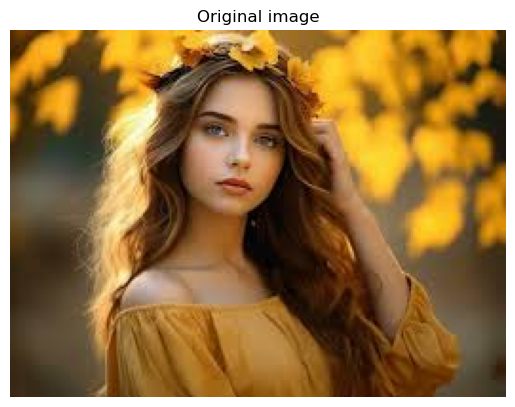

In [26]:
img = cv2.imread("girl image.jpg")
print("Image Shape",img.shape)
show_image(img,"Original image")

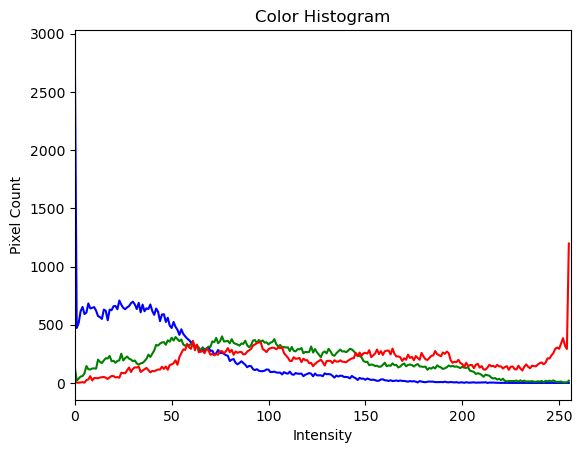

In [27]:
# Load the color image
image = cv2.imread("girl image.jpg")

# Check if the image was loaded successfully
if image is None:
    print("Image not found or could not be loaded.")
else:
    # Split the image into its Blue, Green, and Red channels
    channels = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("Color Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Pixel Count")

    # Calculate and plot the histogram for each channel
    for (channel, color) in zip(channels, colors):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

    plt.show()

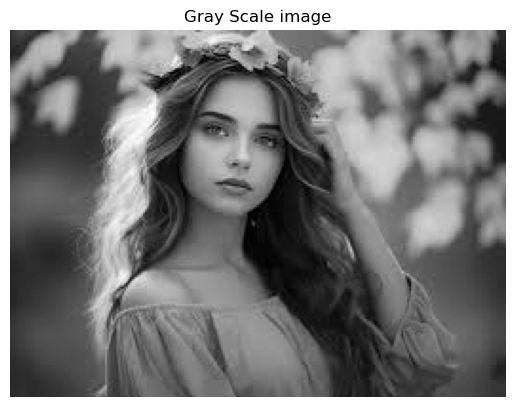

Image Shape ->  (193, 261, 3)


In [28]:
img1 = cv2.imread("girl image.jpg",cv2.IMREAD_GRAYSCALE)
show_image(img1, "Gray Scale image" )
print("Image Shape -> ",img.shape)

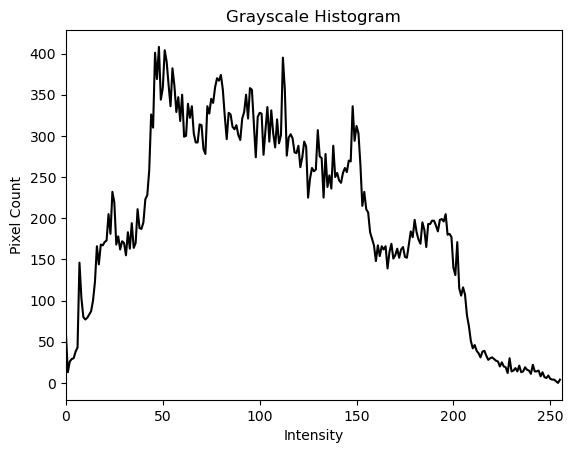

In [29]:
# Load the grayscale image
image = cv2.imread("girl image.jpg", cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Image not found or could not be loaded.")
else:
    # Calculate the histogram for the grayscale image
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Pixel Count")
    plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.show()


# Image resizing

Resized Image Shape (800, 800, 3)


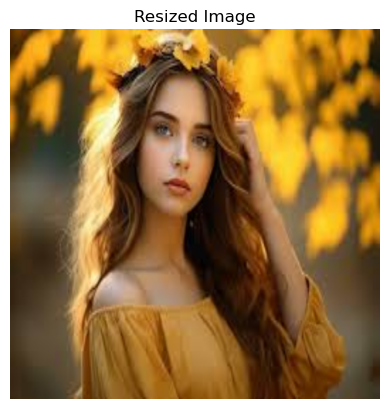

In [30]:
imgResized = cv2.resize(img,(800,800)) 
print("Resized Image Shape",imgResized.shape)
show_image(imgResized,"Resized Image")

Cropped Image Shape (100, 200, 3)


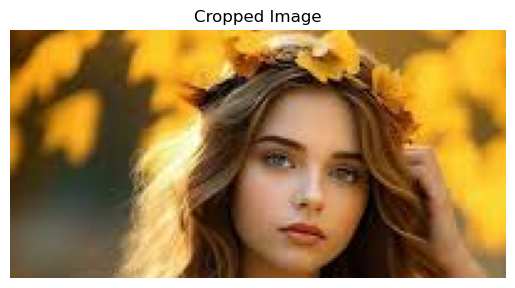

In [31]:
imgCropped = img[:100,:200]
print("Cropped Image Shape",imgCropped.shape)
show_image(imgCropped,"Cropped Image")

#  Image Concatenation

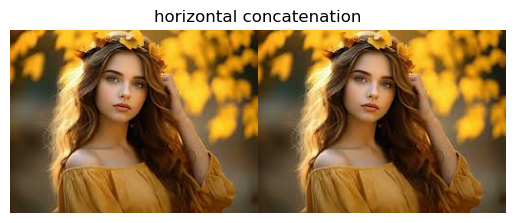

In [32]:
hor = np.hstack((img,img))
show_image(hor,"horizontal concatenation")

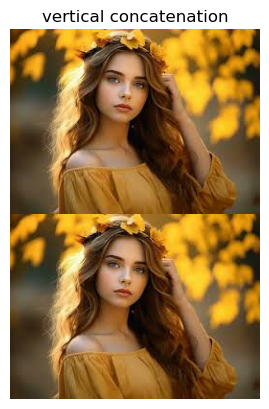

In [33]:
ver = np.vstack((img,img))
show_image(ver,"vertical concatenation")

# Blending two images

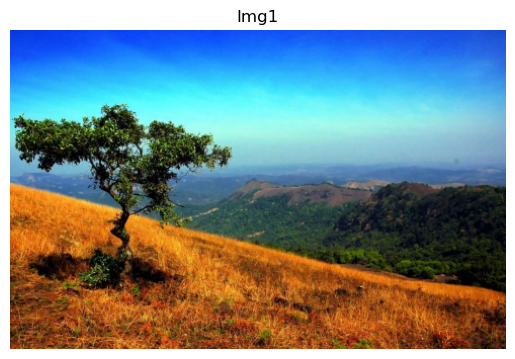

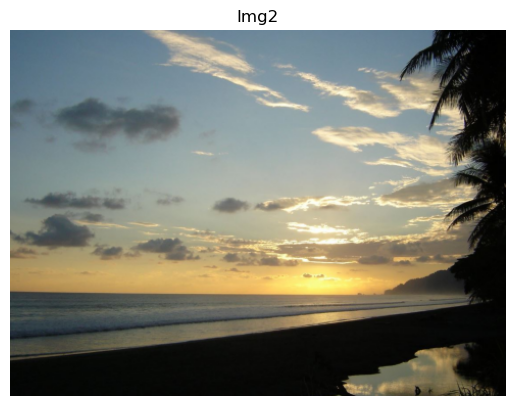

In [34]:
img1 = cv2.imread("Image1.png")
img2 = cv2.imread("Image2.png")

show_image(img1,title="Img1")
show_image(img2,title="Img2")

In [35]:
print(img1.shape)
print(img2.shape)

(315, 490, 3)
(359, 486, 3)


In [36]:
# Making image sizes the same
img1 = cv2.resize(img1,(300,300))
img2 = cv2.resize(img2,(300,300))

print(img1.shape)
print(img2.shape)

(300, 300, 3)
(300, 300, 3)


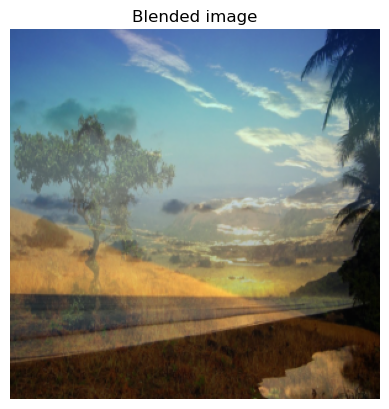

In [37]:
# Blended image = alpha*img1 + beta*img2
alpha= 0.3
beta= 1- alpha
blended = cv2.addWeighted(src1=img1,alpha=alpha,src2=img2,beta=beta,gamma=0)
show_image(blended,title="Blended image")

# Watercolour Effect

In [8]:
import cv2
import numpy as np

# Load image
img = cv2.imread('Image1.png')

# Apply watercolor effect
img_watercolor = cv2.stylization(img, sigma_s=60, sigma_r=0.6)

# Display result
cv2.imshow('Watercolor Effect', img_watercolor)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Gradients

In [9]:
import cv2

# Read a grayscale image
image = cv2.imread('girl image.jpg', 0)

# Compute image gradients using different methods
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display the original image and the computed gradients
cv2.imshow('Original Image', image)
cv2.imshow('Sobel X', sobel_x)
cv2.imshow('Sobel Y', sobel_y)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Counter Detection

In [10]:
import cv2

# read the image
image = cv2.imread('image for counter.webp')
 
# B, G, R channel splitting
blue, green, red = cv2.split(image)
 
# detect contours using blue channel and without thresholding
contours1, hierarchy1 = cv2.findContours(image=blue, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
 
# draw contours on the original image
image_contour_blue = image.copy()
cv2.drawContours(image=image_contour_blue, contours=contours1, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
cv2.imshow('Contour detection using blue channels only', image_contour_blue)
cv2.waitKey(0)
cv2.imwrite('blue_channel.jpg', image_contour_blue)
cv2.destroyAllWindows()
 
# detect contours using green channel and without thresholding
contours2, hierarchy2 = cv2.findContours(image=green, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_green = image.copy()
cv2.drawContours(image=image_contour_green, contours=contours2, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
cv2.imshow('Contour detection using green channels only', image_contour_green)
cv2.waitKey(0)
cv2.imwrite('green_channel.jpg', image_contour_green)
cv2.destroyAllWindows()
 
# detect contours using red channel and without thresholding
contours3, hierarchy3 = cv2.findContours(image=red, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_red = image.copy()
cv2.drawContours(image=image_contour_red, contours=contours3, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
cv2.imshow('Contour detection using red channels only', image_contour_red)
cv2.waitKey(0)
cv2.imwrite('red_channel.jpg', image_contour_red)
cv2.destroyAllWindows()